## Airbnb DC Hosting Helper ##

## 2_data_cleaning ##

Import libraries and read in data

In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, requests

In [491]:
pd.set_option('display.max_columns', 300)

In [492]:
pd.set_option('display.max_rows', 300)

In [493]:
listings = pd.read_csv('../data/listings.csv.gz')

In [494]:
neighborhood_venues = pd.read_csv('../data/neighborhood_venues.csv').drop(columns=['Unnamed: 0'])

In [495]:
reviews = pd.read_csv('../data/reviews.csv.gz')

In [496]:
listings.head()

id                        listing_url       scrape_id last_scraped  \
0  3686  https://www.airbnb.com/rooms/3686  20210710190002   2021-07-11   
1  3943  https://www.airbnb.com/rooms/3943  20210710190002   2021-07-11   
2  4529  https://www.airbnb.com/rooms/4529  20210710190002   2021-07-11   
3  4967  https://www.airbnb.com/rooms/4967  20210710190002   2021-07-11   
4  5589  https://www.airbnb.com/rooms/5589  20210710190002   2021-07-11   

                               name  \
0                   Vita's Hideaway   
1  Historic Rowhouse Near Monuments   
2         Bertina's  House Part One   
3                    DC, Near Metro   
4          Cozy apt in Adams Morgan   

                                         description  \
0  IMPORTANT NOTES<br />* Carefully read and be s...   
1  Please contact us before booking to make sure ...   
2  This is  large private  bedroom with plenty of...   
3  <b>The space</b><br />Hello, my name is Seveer...   
4  This is a 1 br (bedroom + living room in Adams...   

                               neighborhood_overview  \
0  We love that our neighborhood is up and coming...   
1  This rowhouse is centrally located in the hear...   
2  Very quiet neighborhood and it is easy accessi...   
3                                                NaN   
4  Adams Morgan spills over with hipsters, salsa ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/61e02c7e-3d66...     4645   
1  https://a0.muscache.com/pictures/432713/fab7dd...     5059   
2  https://a0.muscache.com/pictures/86072003/6709...     5803   
3  https://a0.muscache.com/pictures/2439810/bb320...     7086   
4  https://a0.muscache.com/pictures/207249/9f1df8...     6527   

                                 host_url        host_name  host_since  \
0  https://www.airbnb.com/users/show/4645             Vita  2008-11-26   
1  https://www.airbnb.com/users/show/5059             Vasa  2008-12-12   
2  https://www.airbnb.com/users/show/5803  Bertina'S House  2008-12-30   
3  https://www.airbnb.com/users/show/7086           Seveer  2009-01-26   
4  https://www.airbnb.com/users/show/6527              Ami  2009-01-13   

                                       host_location  \
0  Washington D.C., District of Columbia, United ...   
1    Washington, District of Columbia, United States   
2    Washington, District of Columbia, United States   
3  Washington D.C., District of Columbia, United ...   
4  Washington D.C., District of Columbia, United ...   

                                          host_about  host_response_time  \
0  I am a literary scholar, teacher, poet, vegan ...        within a day   
1  I have been living and working in DC for the l...  within a few hours   
2  I am an easy going, laid back person who loves...                 NaN   
3  I am fun, honest and very easy going and trave...  within a few hours   
4  I am an environmentalist, and I own and operat...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                80%                  75%                 f   
1               100%                  29%                 f   
2                NaN                  NaN                 f   
3               100%                  78%                 t   
4               100%                  17%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/4645/profile_...   
1  https://a0.muscache.com/im/pictures/user/8ec69...   
2  https://a0.muscache.com/im/users/5803/profile_...   
3  https://a0.muscache.com/im/pictures/user/6efb4...   
4  https://a0.muscache.com/im/users/6527/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/4645/profile_...          Anacostia   
1  https://a0.muscache.com/im/pictures/user/8ec69...          Eckington   
2  https://a0.muscache.com/im/users/5803/profile_...   Eastland Gardens   

In [497]:
neighborhood_venues.head()

neighbourhood_cleansed   latitude  longitude  \
0             Brightwood Park, Crestwood, Petworth  38.946504 -77.024729   
1                    Brookland, Brentwood, Langdon  38.926110 -76.983434   
2                       Capitol Hill, Lincoln Park  38.884692 -76.992667   
3  Capitol View, Marshall Heights, Benning Heights  38.885287 -76.931463   
4   Cathedral Heights, McLean Gardens, Glover Park  38.924179 -77.075507   

   historic site  museum  metro  music venue  perfomring arts venue  \
0              1       1      1            3                      5   
1              0       0      0            2                      6   
2              8       6      2            0                      9   
3              1       0      1            0                      0   
4              5       0      0            1                      4   

   college and university  food  nightlife spot  outdoors and recreation  \
0                       8    48              15                       47   
1                       6    44              22                       29   
2                      13    50              49                       46   
3                       4    13               1                       15   
4                      17    48              27                       44   

   government building  clothing store  
0                   10              10  
1                   10               8  
2                   49              23  
3                    4               0  
4                   24               2

In [498]:
reviews.head()

listing_id      id        date  reviewer_id reviewer_name  \
0        3686  131293  2010-11-01       257234        Callie   
1        3686  150766  2010-12-08       255888       Patrick   
2        3686  177749  2011-02-02       366688      Benjamin   
3        3686  197451  2011-03-12       213492          T.J.   
4        3686  213212  2011-03-30       428455  Pete & Leila   

                                            comments  
0  Staying with Levita and her wonderful family w...  
1  Vita is a very welcoming, helpful and friendly...  
2  This was my first time using "airbnb" and it m...  
3  First, Vita saved my work week by providing me...  
4  Great host! Very welcoming and organised. I st...

In [499]:
listings.shape

(8033, 74)

In [500]:
neighborhood_venues.shape

(39, 14)

In [501]:
reviews.shape

(296276, 6)

In [502]:
neighborhood_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   neighbourhood_cleansed   39 non-null     object 
 1   latitude                 39 non-null     float64
 2   longitude                39 non-null     float64
 3   historic site            39 non-null     int64  
 4   museum                   39 non-null     int64  
 5   metro                    39 non-null     int64  
 6   music venue              39 non-null     int64  
 7   perfomring arts venue    39 non-null     int64  
 8   college and university   39 non-null     int64  
 9   food                     39 non-null     int64  
 10  nightlife spot           39 non-null     int64  
 11  outdoors and recreation  39 non-null     int64  
 12  government building      39 non-null     int64  
 13  clothing store           39 non-null     int64  
dtypes: float64(2), int64(11), ob

In [503]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296276 entries, 0 to 296275
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     296276 non-null  int64 
 1   id             296276 non-null  int64 
 2   date           296276 non-null  object
 3   reviewer_id    296276 non-null  int64 
 4   reviewer_name  296276 non-null  object
 5   comments       296086 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.6+ MB


Merge neighborhood venue information with listings

In [504]:
full_listings = listings.merge(neighborhood_venues, on='neighbourhood_cleansed' )

In [505]:
full_listings.sort_values(by='id', inplace=True)

full_listings.head()

id                        listing_url       scrape_id last_scraped  \
0    3686  https://www.airbnb.com/rooms/3686  20210710190002   2021-07-11   
65   3943  https://www.airbnb.com/rooms/3943  20210710190002   2021-07-11   
596  4529  https://www.airbnb.com/rooms/4529  20210710190002   2021-07-11   
611  4967  https://www.airbnb.com/rooms/4967  20210710190002   2021-07-11   
826  5589  https://www.airbnb.com/rooms/5589  20210710190002   2021-07-11   

                                 name  \
0                     Vita's Hideaway   
65   Historic Rowhouse Near Monuments   
596         Bertina's  House Part One   
611                    DC, Near Metro   
826          Cozy apt in Adams Morgan   

                                           description  \
0    IMPORTANT NOTES<br />* Carefully read and be s...   
65   Please contact us before booking to make sure ...   
596  This is  large private  bedroom with plenty of...   
611  <b>The space</b><br />Hello, my name is Seveer...   
826  This is a 1 br (bedroom + living room in Adams...   

                                 neighborhood_overview  \
0    We love that our neighborhood is up and coming...   
65   This rowhouse is centrally located in the hear...   
596  Very quiet neighborhood and it is easy accessi...   
611                                                NaN   
826  Adams Morgan spills over with hipsters, salsa ...   

                                           picture_url  host_id  \
0    https://a0.muscache.com/pictures/61e02c7e-3d66...     4645   
65   https://a0.muscache.com/pictures/432713/fab7dd...     5059   
596  https://a0.muscache.com/pictures/86072003/6709...     5803   
611  https://a0.muscache.com/pictures/2439810/bb320...     7086   
826  https://a0.muscache.com/pictures/207249/9f1df8...     6527   

                                   host_url        host_name  host_since  \
0    https://www.airbnb.com/users/show/4645             Vita  2008-11-26   
65   https://www.airbnb.com/users/show/5059             Vasa  2008-12-12   
596  https://www.airbnb.com/users/show/5803  Bertina'S House  2008-12-30   
611  https://www.airbnb.com/users/show/7086           Seveer  2009-01-26   
826  https://www.airbnb.com/users/show/6527              Ami  2009-01-13   

                                         host_location  \
0    Washington D.C., District of Columbia, United ...   
65     Washington, District of Columbia, United States   
596    Washington, District of Columbia, United States   
611  Washington D.C., District of Columbia, United ...   
826  Washington D.C., District of Columbia, United ...   

                                            host_about  host_response_time  \
0    I am a literary scholar, teacher, poet, vegan ...        within a day   
65   I have been living and working in DC for the l...  within a few hours   
596  I am an easy going, laid back person who loves...                 NaN   
611  I am fun, honest and very easy going and trave...  within a few hours   
826  I am an environmentalist, and I own and operat...  within a few hours   

    host_response_rate host_acceptance_rate host_is_superhost  \
0                  80%                  75%                 f   
65                100%                  29%                 f   
596                NaN                  NaN                 f   
611               100%                  78%                 t   
826               100%                  17%                 f   

                                    host_thumbnail_url  \
0    https://a0.muscache.com/im/users/4645/profile_...   
65   https://a0.muscache.com/im/pictures/user/8ec69...   
596  https://a0.muscache.com/im/users/5803/profile_...   
611  https://a0.muscache.com/im/pictures/user/6efb4...   
826  https://a0.muscache.com/im/users/6527/profile_...   

                                      host_picture_url host_neighbourhood  \
0    https://a0.muscache.com/im/users/4645/profile_...          Anacostia   
65   https://a0.muscache.co

In [506]:
full_listings.shape

(8033, 87)

In [507]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 2683
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8033 non-null   int64  
 1   listing_url                                   8033 non-null   object 
 2   scrape_id                                     8033 non-null   int64  
 3   last_scraped                                  8033 non-null   object 
 4   name                                          8032 non-null   object 
 5   description                                   7875 non-null   object 
 6   neighborhood_overview                         5144 non-null   object 
 7   picture_url                                   8033 non-null   object 
 8   host_id                                       8033 non-null   int64  
 9   host_url                                      8033 non-null   o

Drop unnecessary columns from first looking at data. I will be using the overall rating column so am dropping the other subcategory columns for rating.

In [508]:
full_listings.drop(columns=[
    'listing_url',
    'scrape_id',
    'last_scraped',
    'picture_url',
    'host_url',
    'host_name',
    'host_thumbnail_url',
    'host_picture_url',
    'neighbourhood',
    'neighbourhood_group_cleansed',
    'latitude_y',
    'longitude_y',
    'calendar_updated',
    'calendar_last_scraped',
    'license',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
], inplace=True)

In [509]:
full_listings.shape

(8033, 66)

The data exploration below considers if the number of reviews in the last 12 months and getting more inforation on current listings, as they should be prioritized for relevancy.

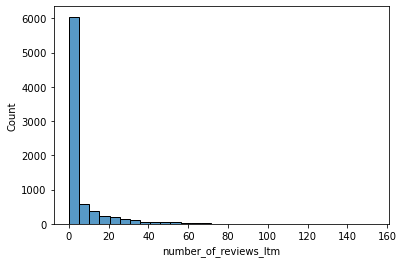

In [510]:
sns.histplot(full_listings['number_of_reviews_ltm' ], bins=30 );

In [511]:
len(full_listings[full_listings['number_of_reviews_ltm']>0])

3666

In [512]:
len(full_listings[full_listings['number_of_reviews_ltm']==0])

4367

There are 3,666 listings that have been reviewed in the past 12 months and 4367 that have not. This shows me that there are lots of listings still up on the site but this is not relevant to users who are looking for active listings. 

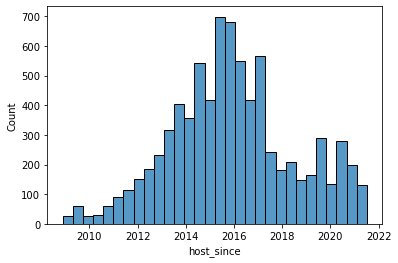

In [513]:
sns.histplot(pd.to_datetime(full_listings['host_since' ]), bins=30 );

In [514]:
len(full_listings[full_listings['host_since']>='2020-07-11'])

569

The only exception to listings that were not reviewed in the past 12 months are new airbnbs that have come on the market but maybe not yet rented. Using the same 12 month time frame, we can see that 569 listings have hosts that began in the last 12 months. I will leave these entries in for now, as they could still be current on the market, just haven't had a review yet.

In [515]:
len(full_listings[(full_listings['number_of_reviews_ltm']>0) | (full_listings['host_since']>='2020-07-11')])

4024

In [516]:
full_listings = full_listings[(full_listings['number_of_reviews_ltm']>0) | (full_listings['host_since']>='2020-07-11')]

In [517]:
full_listings.shape

(4024, 66)

I chose to filter the dataset to only contain recent listings. This is defined as a listing having a review in the past 12 month or a listing having a host that started in the past 12 months but does not yet have a review. Although this cut the datset in half, this decision was made to gather the most accurate information on the DC Airbnb market right now. As I am looking to predict the most popular listings on the current market, listings on the site that are not acctive could confuse the predictions and make it less accurate. This is also in line with the way Airbnb shows listings on their site, they prioritize listings with the current reviews from the past year.

Now that I have a set of more relevant listings, I will explore ratings and number of reviews below to come up with criteria for the popular target variable below. First, I will look at the overall rating scores.

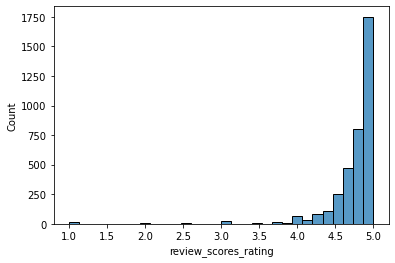

In [518]:
sns.histplot( full_listings['review_scores_rating'], bins=30);

In [519]:
full_listings['review_scores_rating'].isnull().sum()

358

In [520]:
full_listings['review_scores_rating'] = full_listings['review_scores_rating'].fillna(0)

I filled the nulls to be 0 to represent no ratings in the data.

In [521]:
len(full_listings[full_listings['review_scores_rating']>4])

3508

In the above print outs, we learn some interesting things about the overall rating score. First, there are 358 nulls showing that these airbnbs have never been rated. Second, we see that for the 3,666 airbnbs that are rated, 3,508 airbnbs (96%) have an overall rating above a 4. This shows pretty good quality overall for the DC airbnbs that have been rated.

In [522]:
full_listings['review_scores_rating'].quantile(.5)

4.83

In [523]:
full_listings['review_scores_rating'].quantile(.7)

4.93

In [524]:
len(full_listings[full_listings['review_scores_rating']>=4.83])

2035

In [525]:
len(full_listings[full_listings['review_scores_rating']>=4.93])

1224

Since the DC airbnbs are all pretty high quality, I will look into different percentiles to see which should be used as a threshhold to help indicate popularity. Aboce, we can see that the 50th percentile has a very high rating of 4.83 and there are 2,035 listings in this category. Also, the 70th percentile of ratings is 4.93 and 1,224 airbnbs are in this category. 

It's clear that to be considered the best in DC, the airbnb needs to meet high rating standards. When thinking of consumers, a 4.83 out of 5 overall rating would indicate high quality and attract guests to want to stay there. To be considered popular in DC, it seems an overall rating of 4.83 (the 50th percentile) is reasonable, whereas the 4.93 rating may be too high. I will be using 4.83 as part of the metric to calculate popularity.

Below explores the total number of reviews and how to incorporate this in the popularity target metric.

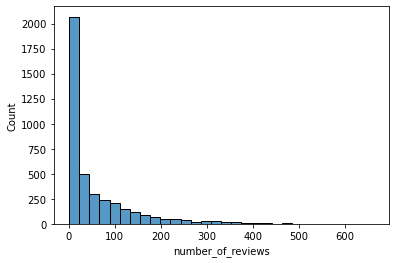

In [526]:
sns.histplot(full_listings['number_of_reviews' ], bins=30 );

In [527]:
full_listings['number_of_reviews' ].value_counts()

0      358
1      311
2      218
3      140
4      110
      ... 
215      1
306      1
308      1
316      1
619      1
Name: number_of_reviews, Length: 365, dtype: int64

In [528]:
len(full_listings[(full_listings['number_of_reviews']==0) & (full_listings['review_scores_rating']==0 )])

358

There are 358 listings with 0 reviews, which perfectly matches the number of airbnbs that have never been rated.

In [529]:
full_listings['number_of_reviews'].quantile(.3)

5.0

In [530]:
full_listings[full_listings['number_of_reviews']>0]['number_of_reviews'].quantile(.3)

8.0

The 30th percentile of number of reviews is 5. When only looking at listings with at least one review, the 30th percentile increases slightly to 8. Was just curious the difference when looking at listings which had been reviewed at least once.

In [531]:
full_listings['number_of_reviews'].quantile(.7)

62.0

In [532]:
full_listings[full_listings['number_of_reviews']>0]['number_of_reviews'].quantile(.7)

70.0

The 70th percentile of number of reviews is 62. When only looking at listings with at least one review, the 70th percentile is higher at 70. There is a larger difference here for listings that have been reviewed at least once.

In [533]:
len(full_listings[(full_listings['number_of_reviews']>=60) & (full_listings['review_scores_rating']>=4.8) ])

815

There are 815 listings that have a rating of at least 4.8 and 60 or more reviews which I would consider to be the most popular listings in the dataset. I chose this criteria based off of the percentile information in my data exploration and just rounded to cutoff numbers that make sense. I also wanted to keep in all information for listings that did not have reivews or ratings yet since this will influence the popularity of the listing.

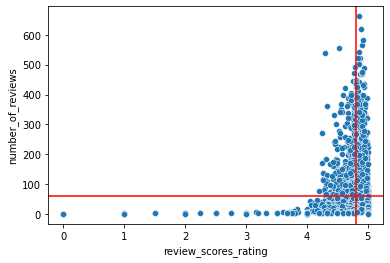

In [534]:
sns.scatterplot(x = 'review_scores_rating', y='number_of_reviews', data=full_listings);
plt.axhline(60, color='r');
plt.axvline(4.8, color='r');

The graph above helps visualize the relationship of number of reviews to the rating. We can see that the ratings congregate above 4, but there is a increasing relationship between number of reviews and highest ratings and shows popularity. The horizontal and vertical red lines show where the cut offs are for our 'popular' criteria. I am looking to predict whether or not the listing will show up in the top right quandrant of the graph and looking to understand what features make this possible.

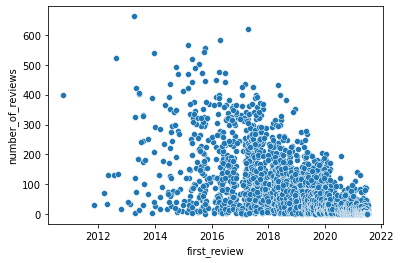

In [535]:
sns.scatterplot(x = pd.to_datetime(full_listings['first_review']), y='number_of_reviews', data=full_listings);

This graph above shows the number of total reviews in relation to the date of the first review. It makes sense that listings with a older first review date now have a greater total number of listings. However, any listing with over 60 reviews will be considered popular. 60 or more reviews would be realistic even if a host started in the last 12 months or has rented for multiple years.

After my data exploration as to what makes a listing the most popular, I am going to create the target variable, popularity, to incdicate whether a listing is considered popluar on the market or not. From my data exploration, I have concluded that to be considered popular on the dc market right now, a listing should have at least 60 total reviews and a rating of at least 4.8.

In [536]:
len(full_listings[(full_listings['number_of_reviews']>=60) & 
                  (full_listings['review_scores_rating']>=4.8)])

815

815 out of 4,024 listings (20%) meet the criteria for 'popular' listed above. 

In [537]:
full_listings['popular']  = np.where((full_listings['number_of_reviews']>=60) & 
                                     (full_listings['review_scores_rating']>=4.8), 1, 0)

In [538]:
full_listings.head()

id                                              name  \
0      3686                                   Vita's Hideaway   
1173   7103  Best of Washington - Great neighborhood, parking   
1253   9641                   Sophisticated Logan Circle Loft   
1902  11785                          Sanctuary near Cathedral   
1903  12442                    Peaches & Cream near Cathedral   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1173  Private guest suite with cathedral ceiling sur...   
1253  Stay in or go out. Either way, you'll enjoy th...   
1902  <b>The space</b><br />An English basement like...   
1903  <b>The space</b><br />Life as it was in days g...   

                                  neighborhood_overview  host_id  host_since  \
0     We love that our neighborhood is up and coming...     4645  2008-11-26   
1173  IDEAL AND IDYLLIC LOCATION:<br />• Quiet, safe...    17633  2009-05-18   
1253  Logan Circle is a historic, residential neighb...    32067  2009-08-17   
1902  Our neighborhood is informally known as Cathed...    32015  2009-08-16   
1903  There is so much to love in Cathedral Heights!...    32015  2009-08-16   

                                          host_location  \
0     Washington D.C., District of Columbia, United ...   
1173    Washington, District of Columbia, United States   
1253  Washington D.C., District of Columbia, United ...   
1902  Washington, D.C., District of Columbia, United...   
1903  Washington, D.C., District of Columbia, United...   

                                             host_about host_response_time  \
0     I am a literary scholar, teacher, poet, vegan ...       within a day   
1173  My business is LUXbnb, we offer short-stay fur...     within an hour   
1253  A former technology executive and entrepreneur...       within a day   
1902  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   
1903  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                   80%                  75%                 f   
1173               100%                  93%                 f   
1253               100%                  35%                 f   
1902               100%                 100%                 f   
1903               100%                 100%                 f   

     host_neighbourhood  host_listings_count  host_total_listings_count  \
0             Anacostia                  2.0                        2.0   
1173            Berkley                 48.0                       48.0   
1253       Logan Circle                  4.0                        4.0   
1902  Cathedral Heights                  4.0                        4.0   
1903  Cathedral Heights                  4.0                        4.0   

                                     host_verifications host_has_profile_pic  \
0     ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1173  ['email', 'phone', 'reviews', 'offline_governm...                    t   
1253  ['email', 'phone', 'facebook', 'reviews', 'off...                    t   
1902               ['email', 'phone', 'reviews', 'kba']                    t   
1903               ['email', 'phone', 'reviews', 'kba']                    t   

     host_identity_verified  \
0                         t   
1173                      t   
1253                      t   
1902                      t   
1903                      t   

                                 neighbourhood_cleansed  latitude_x  \
0                                    Historic Anacostia    38.86339   
1173  Spring Valley, Palisades, Wesley Heights, Foxh...    38.91999   
1253         Dupont Circle, Connecticut Avenue/K Street    38.90927   
1902     Cathedral Heights, McLean Gardens, Glover Park    38.92622   
1903     Cathedral Heights, McLean Gardens, Glover Park    38.92756   

      longitude

In [539]:
full_listings['popular'].value_counts(normalize=True)

0    0.797465
1    0.202535
Name: popular, dtype: float64

I added the popular target column to the dataset based on the criteria descirbed above. 

Just a note here that popularity metric is not a perfect metric because longer stays will have fewer reviews. This is a limitation of this metric. However, according to [IPropertyManagement](https://ipropertymanagement.com/research/airbnb-statistics), a site that has conducted research on Airbnb listings worldwide, the average stay in an Airbnb is 4.3 nights. The popularity metric should be representative of the average stay in DC.

Below, I will perform data cleaning on the other variables in the dataset. First, I will drop more unnecessary columns and any variables related to the target variable to prevent data leakage.

In [540]:
full_listings.drop(columns = ['host_id', 
                              'host_location',
                              'host_neighbourhood',
                              'host_listings_count',
                              'reviews_per_month',
                              'number_of_reviews_l30d',
                              'number_of_reviews',
                              'number_of_reviews_ltm',
                              'review_scores_rating'
                             ], inplace=True)

In [549]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 2683
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            4024 non-null   int64          
 1   name                                          4024 non-null   object         
 2   description                                   3971 non-null   object         
 3   neighborhood_overview                         2836 non-null   object         
 4   host_since                                    4014 non-null   datetime64[ns] 
 5   host_about                                    2550 non-null   object         
 6   host_response_time                            3687 non-null   object         
 7   host_response_rate                            3687 non-null   object         
 8   host_acceptance_rate                          3857 non-nul

Below, I will change all date columns to the datetime format. Then I will create a column to note the current day of the pull and convert the other datetimes to number of days based on this information.

In [542]:
full_listings['host_since'] = pd.to_datetime(full_listings['host_since'])

In [545]:
full_listings['current_day'] = pd.to_datetime(['2021-07-11']*4024)

In [548]:
full_listings['days_being_host'] = full_listings['current_day'] - full_listings['host_since'] 

full_listings.head()

id                                              name  \
0      3686                                   Vita's Hideaway   
1173   7103  Best of Washington - Great neighborhood, parking   
1253   9641                   Sophisticated Logan Circle Loft   
1902  11785                          Sanctuary near Cathedral   
1903  12442                    Peaches & Cream near Cathedral   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1173  Private guest suite with cathedral ceiling sur...   
1253  Stay in or go out. Either way, you'll enjoy th...   
1902  <b>The space</b><br />An English basement like...   
1903  <b>The space</b><br />Life as it was in days g...   

                                  neighborhood_overview host_since  \
0     We love that our neighborhood is up and coming... 2008-11-26   
1173  IDEAL AND IDYLLIC LOCATION:<br />• Quiet, safe... 2009-05-18   
1253  Logan Circle is a historic, residential neighb... 2009-08-17   
1902  Our neighborhood is informally known as Cathed... 2009-08-16   
1903  There is so much to love in Cathedral Heights!... 2009-08-16   

                                             host_about host_response_time  \
0     I am a literary scholar, teacher, poet, vegan ...       within a day   
1173  My business is LUXbnb, we offer short-stay fur...     within an hour   
1253  A former technology executive and entrepreneur...       within a day   
1902  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   
1903  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                   80%                  75%                 f   
1173               100%                  93%                 f   
1253               100%                  35%                 f   
1902               100%                 100%                 f   
1903               100%                 100%                 f   

      host_total_listings_count  \
0                           2.0   
1173                       48.0   
1253                        4.0   
1902                        4.0   
1903                        4.0   

                                     host_verifications host_has_profile_pic  \
0     ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1173  ['email', 'phone', 'reviews', 'offline_governm...                    t   
1253  ['email', 'phone', 'facebook', 'reviews', 'off...                    t   
1902               ['email', 'phone', 'reviews', 'kba']                    t   
1903               ['email', 'phone', 'reviews', 'kba']                    t   

     host_identity_verified  \
0                         t   
1173                      t   
1253                      t   
1902                      t   
1903                      t   

                                 neighbourhood_cleansed  latitude_x  \
0                                    Historic Anacostia    38.86339   
1173  Spring Valley, Palisades, Wesley Heights, Foxh...    38.91999   
1253         Dupont Circle, Connecticut Avenue/K Street    38.90927   
1902     Cathedral Heights, McLean Gardens, Glover Park    38.92622   
1903     Cathedral Heights, McLean Gardens, Glover Park    38.92756   

      longitude_x          property_type        room_type  accommodates  \
0       -76.98889  Private room in house     Private room             1   
1173    -77.09774     Entire guest suite  Entire home/apt             2   
1253    -77.03471            Entire loft  Entire home/apt             4   
1902    -77.07591       Entire apartment  Entire home/apt             4   
1903    -77.07667  Private room in house     Private room             2   

      bathrooms    bathrooms_text  bedrooms  beds  \
0           NaN    1 private bath       1.0   1.0   
1173        NaN            1 bath       1.0   2.0   
1253        NaN            1 bath       1.0   2.0   
1902   

In [550]:
full_listings['first_review'] = pd.to_datetime(full_listings['first_review'])

In [551]:
full_listings['last_review'] = pd.to_datetime(full_listings['last_review'])

In [552]:
full_listings['days_since_first_review'] = full_listings['current_day'] - full_listings['first_review'] 

full_listings['days_since_last_review'] = full_listings['current_day'] - full_listings['last_review'] 

full_listings.head()

id                                              name  \
0      3686                                   Vita's Hideaway   
1173   7103  Best of Washington - Great neighborhood, parking   
1253   9641                   Sophisticated Logan Circle Loft   
1902  11785                          Sanctuary near Cathedral   
1903  12442                    Peaches & Cream near Cathedral   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1173  Private guest suite with cathedral ceiling sur...   
1253  Stay in or go out. Either way, you'll enjoy th...   
1902  <b>The space</b><br />An English basement like...   
1903  <b>The space</b><br />Life as it was in days g...   

                                  neighborhood_overview host_since  \
0     We love that our neighborhood is up and coming... 2008-11-26   
1173  IDEAL AND IDYLLIC LOCATION:<br />• Quiet, safe... 2009-05-18   
1253  Logan Circle is a historic, residential neighb... 2009-08-17   
1902  Our neighborhood is informally known as Cathed... 2009-08-16   
1903  There is so much to love in Cathedral Heights!... 2009-08-16   

                                             host_about host_response_time  \
0     I am a literary scholar, teacher, poet, vegan ...       within a day   
1173  My business is LUXbnb, we offer short-stay fur...     within an hour   
1253  A former technology executive and entrepreneur...       within a day   
1902  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   
1903  I am a somewhat gregarious middle-aged PhD/JD ...     within an hour   

     host_response_rate host_acceptance_rate host_is_superhost  \
0                   80%                  75%                 f   
1173               100%                  93%                 f   
1253               100%                  35%                 f   
1902               100%                 100%                 f   
1903               100%                 100%                 f   

      host_total_listings_count  \
0                           2.0   
1173                       48.0   
1253                        4.0   
1902                        4.0   
1903                        4.0   

                                     host_verifications host_has_profile_pic  \
0     ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
1173  ['email', 'phone', 'reviews', 'offline_governm...                    t   
1253  ['email', 'phone', 'facebook', 'reviews', 'off...                    t   
1902               ['email', 'phone', 'reviews', 'kba']                    t   
1903               ['email', 'phone', 'reviews', 'kba']                    t   

     host_identity_verified  \
0                         t   
1173                      t   
1253                      t   
1902                      t   
1903                      t   

                                 neighbourhood_cleansed  latitude_x  \
0                                    Historic Anacostia    38.86339   
1173  Spring Valley, Palisades, Wesley Heights, Foxh...    38.91999   
1253         Dupont Circle, Connecticut Avenue/K Street    38.90927   
1902     Cathedral Heights, McLean Gardens, Glover Park    38.92622   
1903     Cathedral Heights, McLean Gardens, Glover Park    38.92756   

      longitude_x          property_type        room_type  accommodates  \
0       -76.98889  Private room in house     Private room             1   
1173    -77.09774     Entire guest suite  Entire home/apt             2   
1253    -77.03471            Entire loft  Entire home/apt             4   
1902    -77.07591       Entire apartment  Entire home/apt             4   
1903    -77.07667  Private room in house     Private room             2   

      bathrooms    bathrooms_text  bedrooms  beds  \
0           NaN    1 private bath       1.0   1.0   
1173        NaN            1 bath       1.0   2.0   
1253        NaN            1 bath       1.0   2.0   
1902   

In [555]:
full_listings[full_listings['last_review'].isna()==True]

id                                               name  \
6586  43641495            A place of your own | 1BR in Washington   
6587  43641500            A place of your own | 2BR in Washington   
481   43642105            Relax in comfort | Studio in Washington   
482   43642107               Relax in comfort | 2BR in Washington   
483   43642127            Relax in comfort | Studio in Washington   
...        ...                                                ...   
4331  50924025         Everything you need | Studio in Washington   
6441  50937007  All Amenities, Modern  Row Home Minutes to Cap...   
4621  50938704           Everything you need | 2 BR in Washington   
3231  50949809           Clean apartment home | 1BR in Washington   
2683  50949841       Entire apartment for you | 1BR in Washington   

                                            description neighborhood_overview  \
6586  Stay for 90+ nights (minimum nights and rates ...                   NaN   
6587  Stay for 90+ nights (minimum nights and rates ...                   NaN   
481   Stay for 90+ nights (minimum nights and rates ...                   NaN   
482   Stay for 90+ nights (minimum nights and rates ...                   NaN   
483   Stay for 90+ nights (minimum nights and rates ...                   NaN   
...                                                 ...                   ...   
4331  Stay for 90+ nights (minimum nights and rates ...                   NaN   
6441  The residence features wood finishes, art deco...                   NaN   
4621  Stay for 90+ nights (minimum nights and rates ...                   NaN   
3231  Stay for 91+ nights (minimum nights and rates ...                   NaN   
2683  Stay for 91+ nights (minimum nights and rates ...                   NaN   

     host_since host_about host_response_time host_response_rate  \
6586 2020-07-29        NaN     within an hour               100%   
6587 2020-07-29        NaN     within an hour               100%   
481  2020-07-29        NaN     within an hour               100%   
482  2020-07-29        NaN     within an hour               100%   
483  2020-07-29        NaN     within an hour               100%   
...         ...        ...                ...                ...   
4331 2020-07-29        NaN     within an hour               100%   
6441 2020-08-03        NaN                NaN                NaN   
4621 2020-07-29        NaN     within an hour               100%   
3231 2020-09-23        NaN     within an hour               100%   
2683 2020-09-23        NaN     within an hour               100%   

     host_acceptance_rate host_is_superhost  host_total_listings_count  \
6586                  83%                 f                      125.0   
6587                  83%                 f                      125.0   
481                   83%                 f                      125.0   
482                   83%                 f                      125.0   
483                   83%                 f                      125.0   
...                   ...               ...                        ...   
4331                  83%                 f                      125.0   
6441                  NaN                 f                        0.0   
4621                  83%                 f                      125.0   
3231                  95%                 f                     2232.0   
2683                  95%                 f                     2232.0   

      host_verifications host_has_profile_pic host_identity_verified  \
6586  ['email', 'phone']                    t                      t   
6587  ['email', 'phone']                    t                      t   
481   ['email', 'phone']                    t                      t   
482   ['email', 'phone']                    t                      t   
483   ['email', 'phone']                    t                      t   
...                  ...                  ...                    ...   


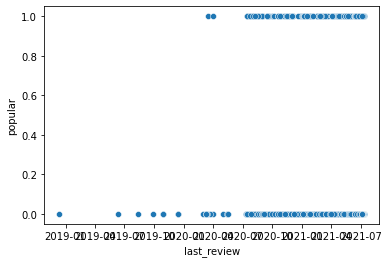

In [557]:
sns.scatterplot(x = 'last_review', y='popular', data=full_listings);

In [560]:
max(full_listings['days_since_last_review'])

Timedelta('941 days 00:00:00')

In [561]:
full_listings['days_since_last_review'].mean()

Timedelta('70 days 04:18:04.124386252')

In [562]:
full_listings['days_since_first_review'].mean()

Timedelta('779 days 04:02:44.975450080')

steps for data cleaning

1. check if review in last 12 months

2. change no ratings to 0

3. add popularity variable

4. correct data types

5. fill nulls

5. remove outliers

6. sentiment analysis for text

In [ ]:
#geo data for maps?

In [ ]:
with open('../data/Neighborhood_Clusters.geojson') as f:
    dc_data = json.load(f)

In [ ]:
dc_data